[語音資料庫下載](https://commonvoice.mozilla.org/zh-TW/datasets)


壓縮檔內容如下 ([詳細介紹](https://github.com/common-voice/cv-dataset#about-the-dataset))


- clips: mp3
- dev.tsv: valid data
- train.tsv: train data
- test.tsv: test data

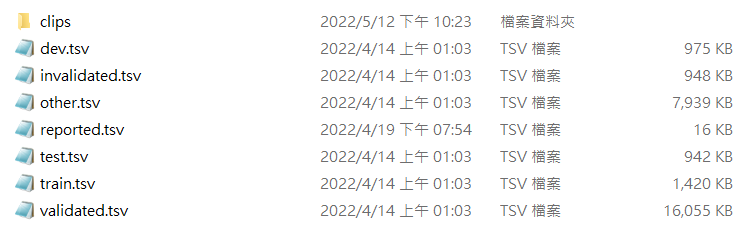

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 改地區跟編號即可，剩下的程式碼不用改
location = "tw"
lang_num = 0

#### <font color=#FF3030>先把tsv檔上傳後，再去執行之後的程式碼</font>

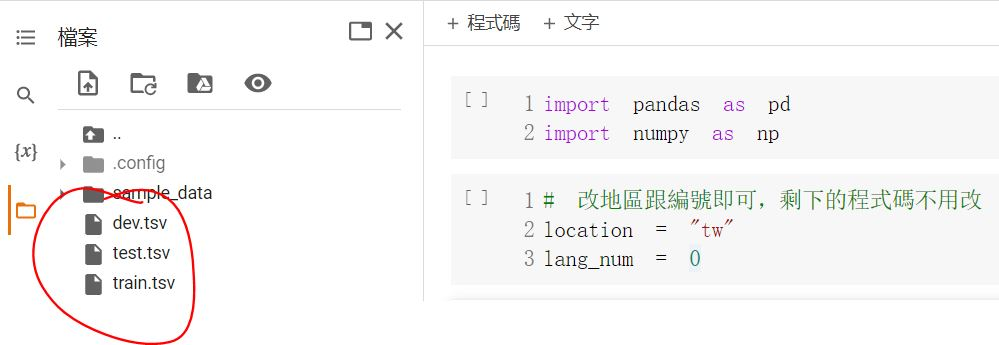

#### 讀取資料

In [ ]:
# train.tsv test.tsv dev.tsv
def load_data(file_name:str) -> pd.DataFrame:
    return pd.read_csv(file_name, sep='\t')

In [ ]:
df_train = load_data("train.tsv")
df_test = load_data("test.tsv")
df_valid = load_data("dev.tsv")

df_list = [df_train, df_test, df_valid]

###### 檢視資料

In [ ]:
df_train

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,d59f6dbd399ff940262b8e71202769c1f26cd7ded29487...,common_voice_zh-TW_20290066.mp3,大家可以公開的下載,2,0,twenties,female,出生地：臺南市,zh-TW,NaN
1,d59f6dbd399ff940262b8e71202769c1f26cd7ded29487...,common_voice_zh-TW_20290078.mp3,洗洗睡了,2,0,twenties,female,出生地：臺南市,zh-TW,NaN
2,d59f6dbd399ff940262b8e71202769c1f26cd7ded29487...,common_voice_zh-TW_20290080.mp3,不好說，不好說阿,2,0,twenties,female,出生地：臺南市,zh-TW,NaN
3,d59f6dbd399ff940262b8e71202769c1f26cd7ded29487...,common_voice_zh-TW_20290111.mp3,才是女性每天面對的現實,2,0,twenties,female,出生地：臺南市,zh-TW,NaN
4,d59f6dbd399ff940262b8e71202769c1f26cd7ded29487...,common_voice_zh-TW_20290115.mp3,實際作道路供公眾通行,2,0,twenties,female,出生地：臺南市,zh-TW,NaN
...,...,...,...,...,...,...,...,...,...,...
6388,c69453a9ae8cdd8ce47e767209e28e254719861de178ac...,common_voice_zh-TW_30243179.mp3,高雄市公車一心幹線,2,0,twenties,male,出生地：新北市,zh-TW,NaN
6389,c69453a9ae8cdd8ce47e767209e28e254719861de178ac...,common_voice_zh-TW_30243185.mp3,花壇端,2,1,twenties,male,出生地：新北市,zh-TW,NaN
6390,c69453a9ae8cdd8ce47e767209e28e254719861de178ac...,common_voice_zh-TW_30243186.mp3,新光路,2,0,twenties,male,出生地：新北市,zh-TW,NaN
6391,c69453a9ae8cdd8ce47e767209e28e254719861de178ac...,common_voice_zh-TW_30243188.mp3,臺北捷運環狀線,2,0,twenties,male,出生地：新北市,zh-TW,NaN


In [ ]:
df_test

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,026126bd8c660d0fcaf88063880cc43113e3a871f7d41c...,common_voice_zh-TW_31210486.mp3,高鐵聯外公路嘉義段,2,0,twenties,male,NaN,zh-TW,NaN
1,07a58168a4139a2f7334d9fa62f233381890ea503c5c2f...,common_voice_zh-TW_30534333.mp3,沒有要讓人看清楚,2,0,NaN,NaN,NaN,zh-TW,NaN
2,0c59e95b306fa50651d5c9b997035f4bd8dff7ee8ea839...,common_voice_zh-TW_31250509.mp3,日式照燒豬排飯,2,0,NaN,NaN,NaN,zh-TW,NaN
3,0c99c366f0da37307d36b86ffd75bda26cae5a8fc3fb73...,common_voice_zh-TW_31149482.mp3,台北捷運淡海線先導公車,2,0,NaN,NaN,NaN,zh-TW,NaN
4,0d70b77b4bfb288e0414fe7ee3b1b01a299a0c28a5b321...,common_voice_zh-TW_18500863.mp3,在黑暗中進行,2,0,NaN,NaN,NaN,zh-TW,NaN
...,...,...,...,...,...,...,...,...,...,...
4613,8296a79ea44a9e71784ee75584364791cc10a0ffeaf219...,common_voice_zh-TW_19506895.mp3,跳樓事件,2,0,twenties,male,出生地：臺北市,zh-TW,NaN
4614,8296a79ea44a9e71784ee75584364791cc10a0ffeaf219...,common_voice_zh-TW_19506896.mp3,很多人都是當了父母,2,0,twenties,male,出生地：臺北市,zh-TW,NaN
4615,8296a79ea44a9e71784ee75584364791cc10a0ffeaf219...,common_voice_zh-TW_19506897.mp3,投入試種,2,0,twenties,male,出生地：臺北市,zh-TW,NaN
4616,742f604c225acd2531b26ed39a6a6458f0b816f238e4c9...,common_voice_zh-TW_18621956.mp3,籌備會委員,2,0,thirties,male,出生地：臺南市,zh-TW,NaN


In [ ]:
df_valid

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,88c71a71f7d86818f49360923eec188c213635387548e8...,common_voice_zh-TW_17460387.mp3,主要概念就是要,2,0,NaN,NaN,NaN,zh-TW,NaN
1,88c71a71f7d86818f49360923eec188c213635387548e8...,common_voice_zh-TW_17460391.mp3,買了生巧克力,2,1,NaN,NaN,NaN,zh-TW,NaN
2,88c71a71f7d86818f49360923eec188c213635387548e8...,common_voice_zh-TW_17460401.mp3,不得以逃到台北,2,0,NaN,NaN,NaN,zh-TW,NaN
3,88c71a71f7d86818f49360923eec188c213635387548e8...,common_voice_zh-TW_17460403.mp3,在車上全身是汗,2,0,NaN,NaN,NaN,zh-TW,NaN
4,88c71a71f7d86818f49360923eec188c213635387548e8...,common_voice_zh-TW_17460404.mp3,當然只能買最便宜的,2,1,NaN,NaN,NaN,zh-TW,NaN
...,...,...,...,...,...,...,...,...,...,...
4613,ed828701d71e5768fe27879f34eb8dd083efebce24b552...,common_voice_zh-TW_17405052.mp3,十分瞧不起他,2,0,twenties,male,NaN,zh-TW,NaN
4614,ed828701d71e5768fe27879f34eb8dd083efebce24b552...,common_voice_zh-TW_17405054.mp3,你曾說過害怕回到當初,2,1,twenties,male,NaN,zh-TW,NaN
4615,ed828701d71e5768fe27879f34eb8dd083efebce24b552...,common_voice_zh-TW_17405107.mp3,這是我十年來的研究成果,2,0,twenties,male,NaN,zh-TW,NaN
4616,93395af80c30de22bd106ddec3a0abd9b20480be8cf885...,common_voice_zh-TW_17428812.mp3,資金管理等技術,2,0,thirties,male,NaN,zh-TW,NaN


#### 檢查資料

In [ ]:
# 檢查資料（理論上沒有問題，因為已經整理過了）
# age, gender, accents 為空，代表該錄音由匿名貢獻者提供，可以不用管
# segment 也可以不用管
def check_data(df:pd.DataFrame) -> None:
    for column in df.columns:
        print(f"{column}: {df[column].isnull().sum()}")
    print("="*50)

In [ ]:
for df in df_list:
    check_data(df)

client_id: 0
path: 0
sentence: 0
up_votes: 0
down_votes: 0
age: 1562
gender: 1574
accents: 1830
locale: 0
segment: 6392
client_id: 0
path: 0
sentence: 0
up_votes: 0
down_votes: 0
age: 2825
gender: 2829
accents: 3745
locale: 0
segment: 4613
client_id: 0
path: 0
sentence: 0
up_votes: 0
down_votes: 0
age: 1624
gender: 1580
accents: 2798
locale: 0
segment: 4612


#### 擷取資料

In [ ]:
def splice_data(df:pd.DataFrame) -> pd.DataFrame:
    df["language"] = lang_num
    return df[["path", "sentence", "language"]]

In [ ]:
for index, df in enumerate(df_list):
    df_list[index] = splice_data(df)

#### 匯出資料

In [ ]:
csv_list = ["train", "test", "valid"]

In [ ]:
def create_csv(df:pd.DataFrame, index:int) -> None:
    df.to_csv(f"{location}_{csv_list[index]}.csv", encoding="utf-8-sig")

for index, df in enumerate(df_list):
    create_csv(df, index)